In [49]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import csv file
with open('heart.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in reader:
        print(', '.join(row))
        

# Read in data
df = pd.read_csv('heart.csv')

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
37,M,ATA,130,283,0,ST,98,N,0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
48,F,ATA,120,284,0,Normal,120,N,0,Up,0
37,F,NAP,130,211,0,Normal,142,N,0,Up,0
58,M,ATA,136,164,0,ST,99,Y,2,Flat,1
39,M,ATA,120,204,0,Normal,145,N,0,Up,0
49,M,ASY,140,234,0,Normal,140,Y,1,Flat,1
42,F,NAP,115,211,0,ST,137,N,0,Up,0
54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
38,M,ASY,110,196,0,Normal,166,N,0,Flat,1
43,F,ATA,120,201,0,Normal,165,N,0,Up,0
60,M,ASY,100,248,0,Normal,125,N,1,Flat,1
36,M,ATA,120,267,0,Normal,160,N,3,Flat,1
43,F,TA,100,223,0,Normal,142,N,0,Up,0
44,M,ATA,120,184,0,Normal,142,N,1,Flat,0
49,F,ATA,124,20

Number of Duplicates: 0
st_slope_Up           -0.622164
chest_pain_type_ATA   -0.401924
MaxHR                 -0.400421
Cholesterol           -0.232741
chest_pain_type_NAP   -0.212964
resting_ecg_Normal    -0.091580
chest_pain_type_TA    -0.054790
resting_ecg_LVH        0.010670
resting_ecg_ST         0.102527
RestingBP              0.107589
st_slope_Down          0.122527
FastingBS              0.267291
Age                    0.282039
Sex                    0.305445
Oldpeak                0.403951
ExerciseAngina         0.494282
chest_pain_type_ASY    0.516716
st_slope_Flat          0.554134
HeartDisease           1.000000
Name: HeartDisease, dtype: float64


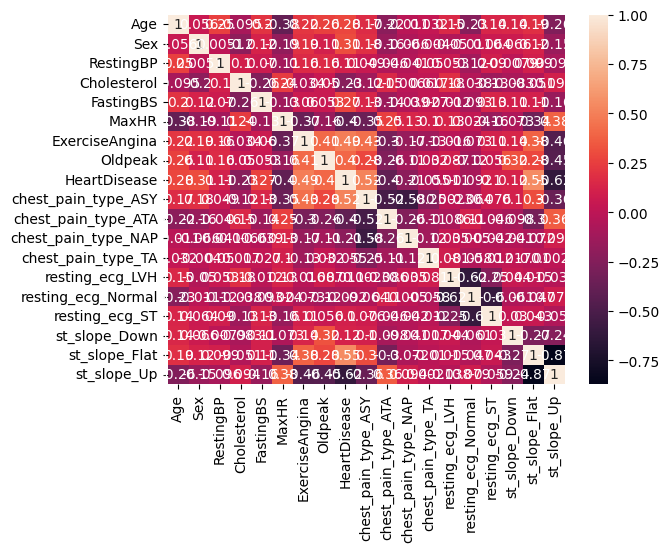

In [50]:
# Traitement des données
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Affichage du nombre de doublons (égal à 0 dans notre cas)
print("Number of Duplicates:", df.duplicated().sum())

# Encodage de Female/Male
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

# Encodage de ChestPainType (ATA, NAP, ASY, TA)
df = pd.get_dummies(df, columns=['ChestPainType'], prefix='chest_pain_type')

# Encodage de RestingECG (Normal, ST, LVH)
df = pd.get_dummies(df, columns=['RestingECG'], prefix='resting_ecg')

# Encodage de ExerciseAngina (No, Yes)
labelencoder = LabelEncoder()
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina'])

# Encodage de ST_Slope (Up, Flat, Down)
df = pd.get_dummies(df, columns=['ST_Slope'], prefix='st_slope')

# Affichage d'une matrice de corrélation
sns.heatmap(df.corr(), annot=True)

# print correlation matrix line for HeartDisease
print(df.corr()['HeartDisease'].sort_values())



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease', 'RestingBP', 'resting_ecg_LVH', 'resting_ecg_Normal', 'resting_ecg_ST'], axis=1)

y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Utile ???
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[0.21561265 0.4        0.18060201 0.01010101 0.23287671]
cv_scores mean (default is R2):  0.20783847546801687
[0.42857143 0.38685897 0.45175395 0.49487166 0.43792787]
cv_scores mean (RMSE):  0.43999677678833543
[0.51338933 0.57727273 0.28985507 0.40193603 0.47260274]
cv_scores mean (default is R2):  0.4510111788923582
[0.33755826 0.32471861 0.42056004 0.38465463 0.36311061]
cv_scores mean (RMSE):  0.3661204302299745
[0.62555995 0.54848485 0.45676948 0.43783514 0.49467275]
cv_scores mean (default is R2):  0.5126644341556215
[0.29610727 0.33559325 0.36782953 0.37293143 0.35543187]
cv_scores mean (RMSE):  0.34557866942285453
[0.6205163  0.58579545 0.47080546 0.46896044 0.46232877]
cv_scores mean (default is R2):  0.5216812852760591
[0.29809486 0.32142857 0.36304644 0.36246041 0.36663034]
cv_scores mean (RMSE):  0.34233212595396034
[0.58863241 0.56690909 0.47777035 0.48415264 0.48821918]
cv_scores mean (default is R2):  0.521136732628176
[0.31036516 0.32867493 0.36064945 0.35723808 0.35769

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.30222756 0.31171241 0.33982789 0.33464775 0.34712123]
cv_scores mean (RMSE):  0.32710736722985845
[array([0.42857143, 0.38685897, 0.45175395, 0.49487166, 0.43792787]), array([0.33755826, 0.32471861, 0.42056004, 0.38465463, 0.36311061]), array([0.29610727, 0.33559325, 0.36782953, 0.37293143, 0.35543187]), array([0.29809486, 0.32142857, 0.36304644, 0.36246041, 0.36663034]), array([0.31036516, 0.32867493, 0.36064945, 0.35723808, 0.35769429]), array([0.31074241, 0.33219761, 0.35740731, 0.35395402, 0.34949409]), array([0.31107111, 0.32567916, 0.35835557, 0.34933149, 0.35112344]), array([0.31339159, 0.31777019, 0.34916689, 0.34825244, 0.35491293]), array([0.30200472, 0.31746032, 0.34533691, 0.34203802, 0.35519388]), array([0.30259647, 0.31676511, 0.34493418, 0.34650834, 0.35394063]), array([0.30567798, 0.31294839, 0.34539921, 0.34968603, 0.35441291]), array([0.30257774, 0.31519529, 0.34069257, 0.34748856, 0.34860834]), array([0.30321175, 0.31684452, 0.33583971, 0.34219199, 0.34711843]), a

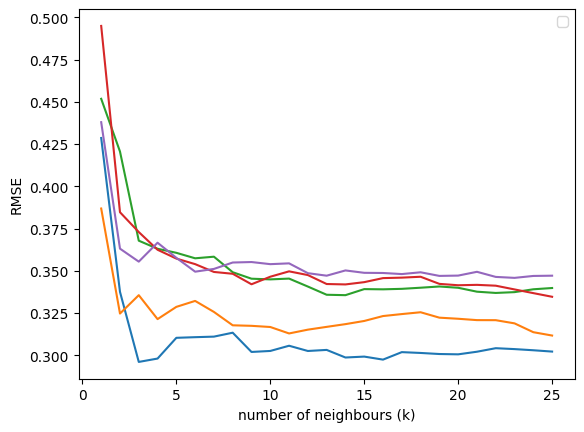

In [37]:
# kNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

list_RMSE = []

for k in range (1, 26):
  knn_cv = KNeighborsRegressor(n_neighbors=k)
  #train model with cv of 5
  cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
  #print each cv score (accuracy) and average them
  print(cv_scores)
  print('cv_scores mean (default is R2): ', np.mean(cv_scores))
  neg_mse_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5,
  scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-neg_mse_scores)
  #print each cv score (accuracy) and average them
  print(rmse_scores)
  print('cv_scores mean (RMSE): ', np.mean(rmse_scores))
  list_RMSE.append(rmse_scores)

print(list_RMSE)

plt.plot(range(1, 26), list_RMSE)
plt.xlabel('number of neighbours (k)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest


rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Number of features to consider at every split
max_features = [None, 'sqrt']
# Create the param grid - dictionary
grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
print(grid)


grid_search = RandomizedSearchCV(estimator=rf, n_iter=100, verbose=2, param_distributions=grid, cv=3, n_jobs=-1, random_state=42)
grid_search.fit(X_train_scaled, y_train)
meilleurs_parametres = grid_search.best_params_
meilleur_modele = grid_search.best_estimator_
meilleur_score = grid_search.best_score_
print("Meilleurs Paramètres:", meilleurs_parametres)
print("Meilleur Score en Validation Croisée:", meilleur_score)
y_pred = meilleur_modele.predict(X_test_scaled)
scores = accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [None, 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Meilleurs Paramètres: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Meilleur Score en Validation Croisée: 0.8719081075052971
Accuracy:  88.04%


In [51]:
# Regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6) #création de l'objet
X_poly_python = poly.fit_transform(X_train)
print(len(X_poly_python)) # nb de features

X_poly_test = poly.fit_transform(X_test)

model_no_reg = LogisticRegression(penalty=None, max_iter=5000)
model_reg = LogisticRegression(penalty='l2', C=1, max_iter=5000)

model_no_reg.fit(X_poly_python, y_train)
model_reg.fit(X_poly_python, y_train)

coef_no_reg = model_no_reg.coef_[0]
intercept_no_reg = model_no_reg.intercept_

coef_reg = model_reg.coef_[0]
intercept_reg = model_reg.intercept_

y_train_pred_no_reg = model_no_reg.predict(X_poly_python)
y_pred_no_reg = model_no_reg.predict(X_poly_test)

y_train_pred_reg = model_reg.predict(X_poly_python)
y_pred_reg = model_reg.predict(X_poly_test)

print("Accuracy (No Reg):", accuracy_score(y_train, y_train_pred_no_reg))
print("Accuracy (No Reg):", accuracy_score(y_test, y_pred_no_reg))

print("Accuracy (Reg):", accuracy_score(y_train, y_train_pred_reg))
print("Accuracy (Reg):", accuracy_score(y_test, y_pred_reg))

734


c:\Users\noela\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (No Reg): 0.8705722070844687
Accuracy (No Reg): 0.8532608695652174
Accuracy (Reg): 0.8705722070844687
Accuracy (Reg): 0.8532608695652174


c:\Users\noela\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Réseau de neurones

# Building the model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

model.build(input_shape=X_train_scaled.shape)

print(model.summary())
from keras.utils import plot_model
plot_model(model, to_file='NN-mnist.png', show_shapes=True)

# Compiling the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

from keras.callbacks import EarlyStopping
# Définir le callback d'arrêt précoce
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# Entraîner le modèle avec l'arrêt précoce
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.3, callbacks=[early_stopping_monitor])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')
#predict returns the probability of each class
y_test_proba = model.predict(X_test_scaled)
print(y_test_proba[0]) #sample 0
print(np.argmax(y_test_proba[0])) #proba maximale me donne la classe
y_predicted_classes = np.argmax(y_test_proba, axis=1)
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_predicted_classes)
print('Test model accuracy:', accuracy_test)

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)